#Predict value of currency "GBP" from currency"BRL" where the "BRL" value is the average value of the currency "BRL"#


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

In [3]:
data = pd.read_csv('currency.csv')
data.head(3)

,Date,EUR,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,GBP,HKD,HRK,ILS,INR
0,2022-05-18,1.052299,0.702494,0.538039,0.202466,0.780153,1.003512,0.148269,0.042695,0.141403,1.242854,0.127411,0.139655,0.298436,0.012889
1,2022-05-17,1.054074,0.703037,0.538967,0.200321,0.779849,1.008065,0.148677,0.042655,0.141653,1.248907,0.127393,0.140089,0.297876,0.012910
2,2022-05-16,1.042209,0.692185,0.532879,0.197316,0.773575,0.994530,0.147232,0.042177,0.140046,1.225490,0.127390,0.138544,0.293789,0.012854


# New Section

In [ ]:
#'''country = "India"
#data = data[data['location']==country]'''
#data = data.dropna(inplace=True)

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date',ascending=True,inplace=True)
data['Date'].min(), data['Date'].max()

(Timestamp('2021-05-18 00:00:00'), Timestamp('2022-05-18 00:00:00'))

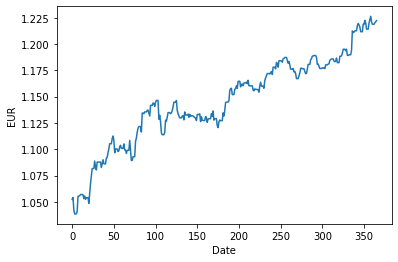

In [5]:
plt.xlabel('Date')
plt.ylabel('EUR')
plt.plot(data['EUR'])

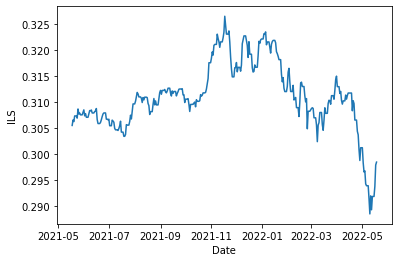

In [6]:
plt.xlabel('Date')
plt.ylabel('ILS')
plt.plot(data['Date'],data['ILS'])

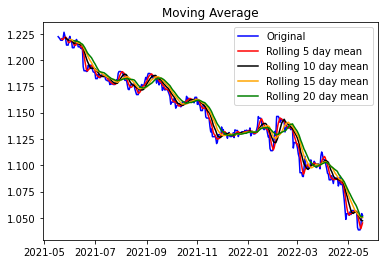

In [7]:
rolling_mean5 = data['EUR'].rolling(window = 5).mean()
rolling_mean10 = data['EUR'].rolling(window = 10).mean()
rolling_mean15 = data['EUR'].rolling(window = 15).mean()
rolling_mean20 = data['EUR'].rolling(window = 20).mean()

plt.plot(data['Date'],data['EUR'], color = 'blue', label = 'Original')

plt.plot(data['Date'],rolling_mean5, color = 'red', label = 'Rolling 5 day mean')
plt.plot(data['Date'],rolling_mean10, color = 'black', label = 'Rolling 10 day mean')
plt.plot(data['Date'],rolling_mean15, color = 'orange', label = 'Rolling 15 day mean')
plt.plot(data['Date'],rolling_mean20, color = 'green', label = 'Rolling 20 day mean')

plt.legend(loc = 'best')
plt.title('Moving Average')

plt.show()

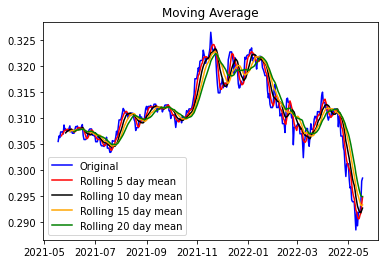

In [8]:
rolling_mean5 = data['ILS'].rolling(window = 5).mean()
rolling_mean10 = data['ILS'].rolling(window = 10).mean()
rolling_mean15 = data['ILS'].rolling(window = 15).mean()
rolling_mean20 = data['ILS'].rolling(window = 20).mean()

plt.plot(data['Date'],data['ILS'], color = 'blue', label = 'Original')

plt.plot(data['Date'],rolling_mean5, color = 'red', label = 'Rolling 5 day mean')
plt.plot(data['Date'],rolling_mean10, color = 'black', label = 'Rolling 10 day mean')
plt.plot(data['Date'],rolling_mean15, color = 'orange', label = 'Rolling 15 day mean')
plt.plot(data['Date'],rolling_mean20, color = 'green', label = 'Rolling 20 day mean')

plt.legend(loc = 'best')
plt.title('Moving Average')

plt.show()

In [9]:
data['moving_avg_5day'] = rolling_mean5
data['moving_avg_10day'] = rolling_mean10
data['moving_avg_15day'] = rolling_mean15
data['moving_avg_20day'] = rolling_mean20
data.head()

,Date,EUR,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,GBP,HKD,HRK,ILS,INR,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
365,2021-05-18,1.222195,0.780884,0.624922,0.190716,0.831808,1.114827,0.155693,0.048067,0.164355,1.421262,0.128771,0.162517,0.305493,0.013697,NaN,NaN,NaN,NaN
364,2021-05-19,1.221150,0.774653,0.624415,0.189276,0.828089,1.109385,0.155381,0.047994,0.164228,1.416230,0.128793,0.162610,0.306542,0.013671,NaN,NaN,NaN,NaN
363,2021-05-20,1.220256,0.775494,0.623947,0.188997,0.825764,1.110248,0.155328,0.047819,0.164099,1.412429,0.128824,0.162501,0.306232,0.013686,NaN,NaN,NaN,NaN
362,2021-05-21,1.218769,0.776398,0.623169,0.188587,0.830220,1.112966,0.155473,0.047886,0.163902,1.419446,0.128785,0.162285,0.307324,0.013725,NaN,NaN,NaN,NaN
361,2021-05-22,1.218769,0.776398,0.623169,0.188587,0.830220,1.112966,0.155473,0.047886,0.163902,1.419446,0.128785,0.162285,0.307324,0.013725,0.306583,NaN,NaN,NaN


In [10]:
data.dropna(inplace=True)
data.tail()

,Date,EUR,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,GBP,HKD,HRK,ILS,INR,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
4,2022-05-14,1.038529,0.689275,0.530983,0.195191,0.768994,1.000000,0.147278,0.041977,0.139561,1.220107,0.127389,0.138099,0.291826,0.012912,0.290663,0.292061,0.294309,0.296175
3,2022-05-15,1.038529,0.689275,0.530983,0.195191,0.768994,1.000000,0.147278,0.041977,0.139561,1.220107,0.127389,0.138099,0.291826,0.012912,0.291335,0.291820,0.293684,0.295547
2,2022-05-16,1.042209,0.692185,0.532879,0.197316,0.773575,0.994530,0.147232,0.042177,0.140046,1.225490,0.127390,0.138544,0.293789,0.012854,0.291705,0.291809,0.293189,0.295052
1,2022-05-17,1.054074,0.703037,0.538967,0.200321,0.779849,1.008065,0.148677,0.042655,0.141653,1.248907,0.127393,0.140089,0.297876,0.012910,0.293429,0.292208,0.293160,0.294904
0,2022-05-18,1.052299,0.702494,0.538039,0.202466,0.780153,1.003512,0.148269,0.042695,0.141403,1.242854,0.127411,0.139655,0.298436,0.012889,0.294751,0.292662,0.293286,0.294888


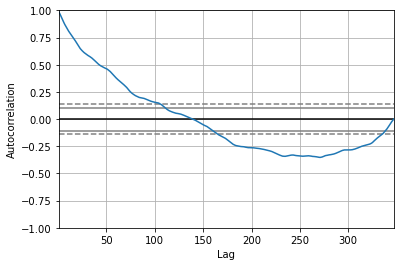

In [12]:
autocorrelation_plot(data['EUR'])
plt.show()

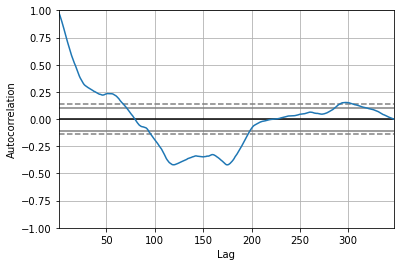

In [13]:
autocorrelation_plot(data['ILS'])
plt.show()

C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


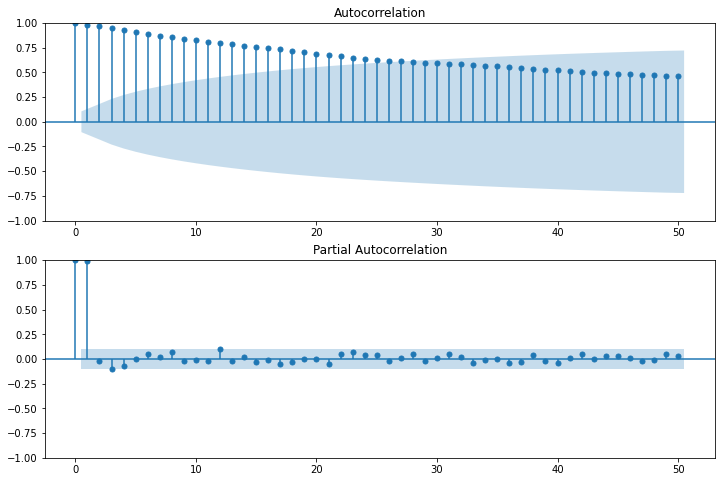

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['EUR'].dropna(),lags=50,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['EUR'].dropna(),lags=50,ax=ax2)


C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


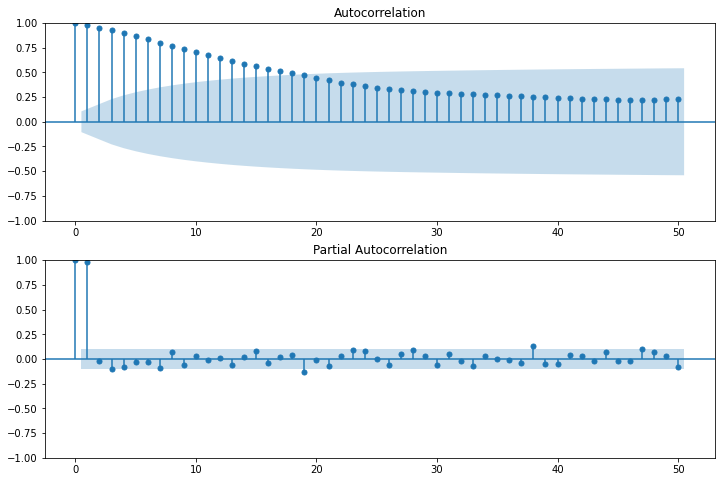

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['ILS'].dropna(),lags=50,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['ILS'].dropna(),lags=50,ax=ax2)

In [16]:
data.EUR

346    1.211681
345    1.216249
344    1.218175
343    1.219512
342    1.217434
         ...   
4      1.038529
3      1.038529
2      1.042209
1      1.054074
0      1.052299
Name: EUR, Length: 347, dtype: float64

In [17]:
data.ILS

346    0.307069
345    0.307730
344    0.308356
343    0.308309
342    0.308471
         ...   
4      0.291826
3      0.291826
2      0.293789
1      0.297876
0      0.298436
Name: ILS, Length: 347, dtype: float64

In [20]:
import statsmodels.api

# 1,1,0 ARIMA Model
model = statsmodels.tsa.arima.model.ARIMA(data.EUR, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    EUR   No. Observations:                  347
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1427.783
Date:                Fri, 30 Sep 2022   AIC                          -2851.566
Time:                        15:11:36   BIC                          -2843.873
Sample:                             0   HQIC                         -2848.502
                                - 347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0069      0.051      0.136      0.892      -0.092       0.106
sigma2      1.523e-05   6.23e-07     24.455      0.000     1.4e-05    1.65e-05
Ljung-Box (L1) (Q):                   0.07   Jarque-

In [21]:
# 1,1,0 ARIMA Model
model = statsmodels.tsa.arima.model.ARIMA(data.ILS, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    ILS   No. Observations:                  347
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1820.281
Date:                Fri, 30 Sep 2022   AIC                          -3636.562
Time:                        15:12:17   BIC                          -3628.870
Sample:                             0   HQIC                         -3633.499
                                - 347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0045      0.038      0.119      0.906      -0.071       0.080
sigma2      1.577e-06   8.28e-08     19.049      0.000    1.42e-06    1.74e-06
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
# 1,1,0 ARIMA Model
model = statsmodels.tsa.arima.model.ARIMA(data.EUR, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    EUR   No. Observations:                  347
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1430.321
Date:                Fri, 30 Sep 2022   AIC                          -2848.642
Time:                        15:12:32   BIC                          -2825.563
Sample:                             0   HQIC                         -2839.452
                                - 347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0005      0.053      0.009      0.992      -0.104       0.105
ar.L2          0.0303      0.074      0.411      0.681      -0.115       0.175
ar.L3          0.0907      0.065      1.404      0.1

In [23]:
# 1,1,0 ARIMA Model
model = statsmodels.tsa.arima.model.ARIMA(data.ILS, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    ILS   No. Observations:                  347
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1820.662
Date:                Fri, 30 Sep 2022   AIC                          -3629.324
Time:                        15:12:41   BIC                          -3606.245
Sample:                             0   HQIC                         -3620.134
                                - 347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0025      0.039      0.063      0.949      -0.074       0.079
ar.L2          0.0051      0.054      0.094      0.925      -0.101       0.111
ar.L3          0.0348      0.052      0.671      0.5

C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

Test MAE: 0.003


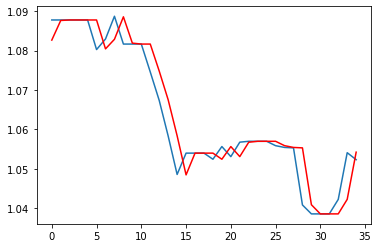

In [24]:
X = data['EUR'].values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
traindf, testdf = data[0:size], data[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = statsmodels.tsa.arima.model.ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#model_fit.forecast()
sqrt(mean_squared_error(predictions,test))

0.005061131628520245

In [26]:
index_future_dates = pd.date_range(start='2022-05-19', end='2022-06-19')
pred = model_fit.forecast(steps=30)
print(pred)

[1.05420685 1.05420834 1.05420836 1.05420836 1.05420836 1.05420836
 1.05420836 1.05420836 1.05420836 1.05420836 1.05420836 1.05420836
 1.05420836 1.05420836 1.05420836 1.05420836 1.05420836 1.05420836
 1.05420836 1.05420836 1.05420836 1.05420836 1.05420836 1.05420836
 1.05420836 1.05420836 1.05420836 1.05420836 1.05420836 1.05420836]


C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

Test MAE: 0.001


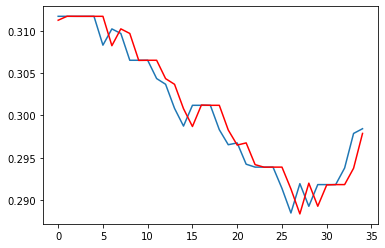

In [28]:
X = data['ILS'].values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
traindf, testdf = data[0:size], data[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = statsmodels.tsa.arima.model.ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [29]:
model_fit.forecast()
pred = model_fit.forecast(steps=30)
print(pred)

[0.29787761 0.29787762 0.29787762 0.29787762 0.29787762 0.29787762
 0.29787762 0.29787762 0.29787762 0.29787762 0.29787762 0.29787762
 0.29787762 0.29787762 0.29787762 0.29787762 0.29787762 0.29787762
 0.29787762 0.29787762 0.29787762 0.29787762 0.29787762 0.29787762
 0.29787762 0.29787762 0.29787762 0.29787762 0.29787762 0.29787762]


In [30]:
mae5day = mean_absolute_error(testdf['BRL'], testdf['moving_avg_5day'])
mae10day = mean_absolute_error(testdf['BRL'], testdf['moving_avg_10day'])
mae15day = mean_absolute_error(testdf['BRL'], testdf['moving_avg_15day'])
mae20day = mean_absolute_error(testdf['BRL'], testdf['moving_avg_20day'])

In [31]:
print(f'Mean absolute error from 5day moving average prediction: {mae5day}')
print(f'Mean absolute error from 10day moving average prediction: {mae10day}')
print(f'Mean absolute error from 15day moving average prediction: {mae15day}')
print(f'Mean absolute error from 20day moving average prediction: {mae20day}')

Mean absolute error from 5day moving average prediction: 0.09748035383085714
Mean absolute error from 10day moving average prediction: 0.09876989631714284
Mean absolute error from 15day moving average prediction: 0.1001563977455238
Mean absolute error from 20day moving average prediction: 0.10144181558242857


In [32]:
mae5day = mean_absolute_error(testdf['GBP'], testdf['moving_avg_5day'])
mae10day = mean_absolute_error(testdf['GBP'], testdf['moving_avg_10day'])
mae15day = mean_absolute_error(testdf['GBP'], testdf['moving_avg_15day'])
mae20day = mean_absolute_error(testdf['GBP'], testdf['moving_avg_20day'])

In [33]:
print(f'Mean absolute error from 5day moving average prediction: {mae5day}')
print(f'Mean absolute error from 10day moving average prediction: {mae10day}')
print(f'Mean absolute error from 15day moving average prediction: {mae15day}')
print(f'Mean absolute error from 20day moving average prediction: {mae20day}')

Mean absolute error from 5day moving average prediction: 0.9605224626177143
Mean absolute error from 10day moving average prediction: 0.9592329201314286
Mean absolute error from 15day moving average prediction: 0.9578464187030477
Mean absolute error from 20day moving average prediction: 0.9565610008661429
